In [ ]:
using Pkg
Pkg.activate("../")

using ConnectedInformation

## Entropy constraints set by NSB algorithm

In [4]:
# Preparing data for plots

using MAT
using Combinatorics

nsb_data = matread("../resources/random_distributions_results/nsb_matlab_entropy_prep.mat")
nsb_results = nsb_data["results"]
random_prob_tables = nsb_data["prob_tables"]
nsb_results = nsb_results .* log2(ℯ)

upper_max_entropies_results = Vector{Vector{Float64}}()
lower_con_inf_results = Vector{Vector{Float64}}()
for i = 1:1000
    entropies_vec = nsb_results[i, :]
    
    # Build dict from matlab array
    entropies_dict = Dict(zip(collect(powerset(1:4)), entropies_vec))

    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies_dict)
    push!(upper_max_entropies_results, estimated_max_entropies)
    connected_information = calculate_connected_information(4, estimated_max_entropies)
    push!(lower_con_inf_results, connected_information)
end 


In [23]:
# Compute naive results

using MAT
using Combinatorics

include("../src/entropy.jl")
using .Entropy: calculate_all_entropies

nsb_data = matread("../resources/random_distributions_results/nsb_matlab_entropy_prep.mat")
random_prob_tables = nsb_data["prob_tables"]

naive_max_entropies_results = Vector{Vector{Float64}}()
naive_con_inf_results = Vector{Vector{Float64}}()
for i = 1:1000
    entropies = calculate_all_entropies(random_prob_tables[i])
    estimated_max_entropies = estimate_max_entropies(4, [2, 2, 2, 2], entropies)
    push!(naive_max_entropies_results, estimated_max_entropies)
    connected_information = calculate_connected_information(4, estimated_max_entropies)
    push!(naive_con_inf_results, connected_information)
end 

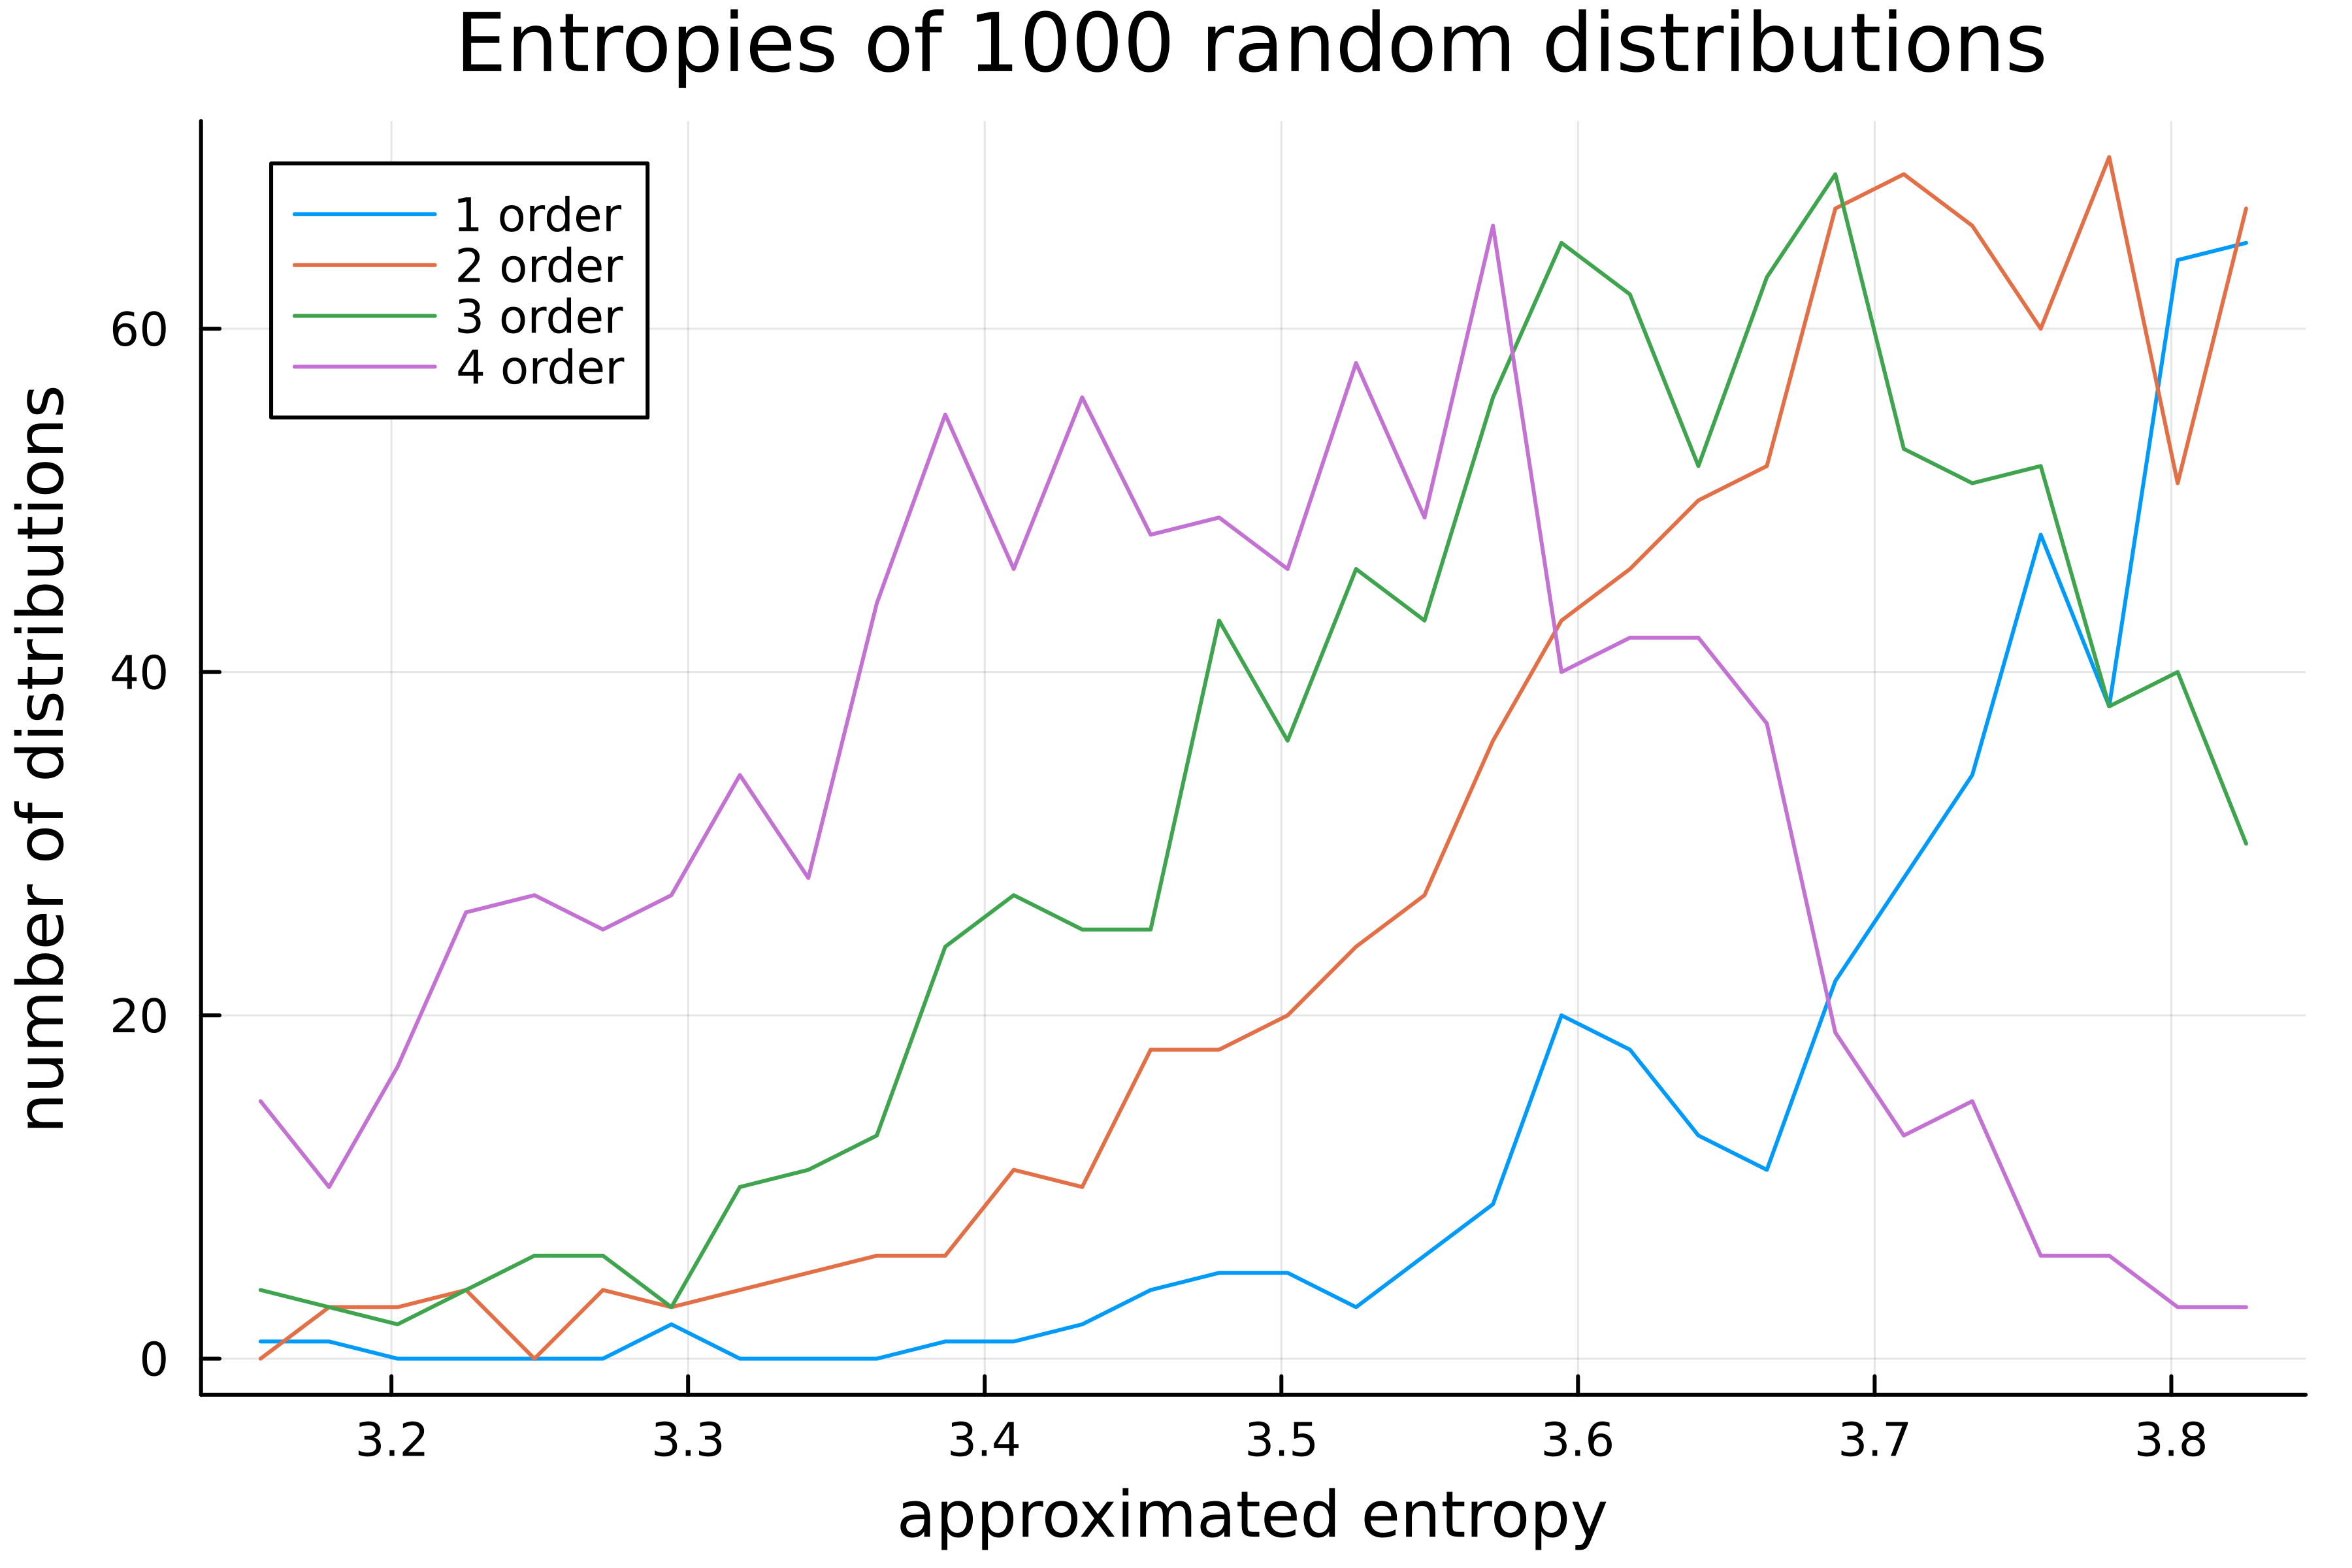

In [18]:
# Building estimated max entropies plot
using Plots

min_e = minimum([upper_max_entropies_results[i][1] for i=1:1000])
max_e = maximum([upper_max_entropies_results[i][4] for i=1:1000]) 

bins_n = 30
bin_size = (max_e - min_e) / bins_n 
bins = zeros(bins_n, 4)

cur_bin_min = min_e
for b_i=1:bins_n
    for j = 1:4
        for i = 1:1000
            cur_ent = upper_max_entropies_results[i][j]
            if cur_bin_min <= cur_ent < (cur_bin_min + bin_size)
                bins[b_i, j] += 1
            end  
        end
    end
    cur_bin_min += bin_size
end

x = [min_e + (i*bin_size) for i=1:bins_n]
plot(
    x, bins,  
    label=["1 order" "2 order" "3 order" "4 order"],
    title="Entropies of 1000 random distributions", 
    dpi=600)
xlabel!("approximated entropy")
ylabel!("number of distributions")
# savefig("entropies_nsb_constraints_1000.png")

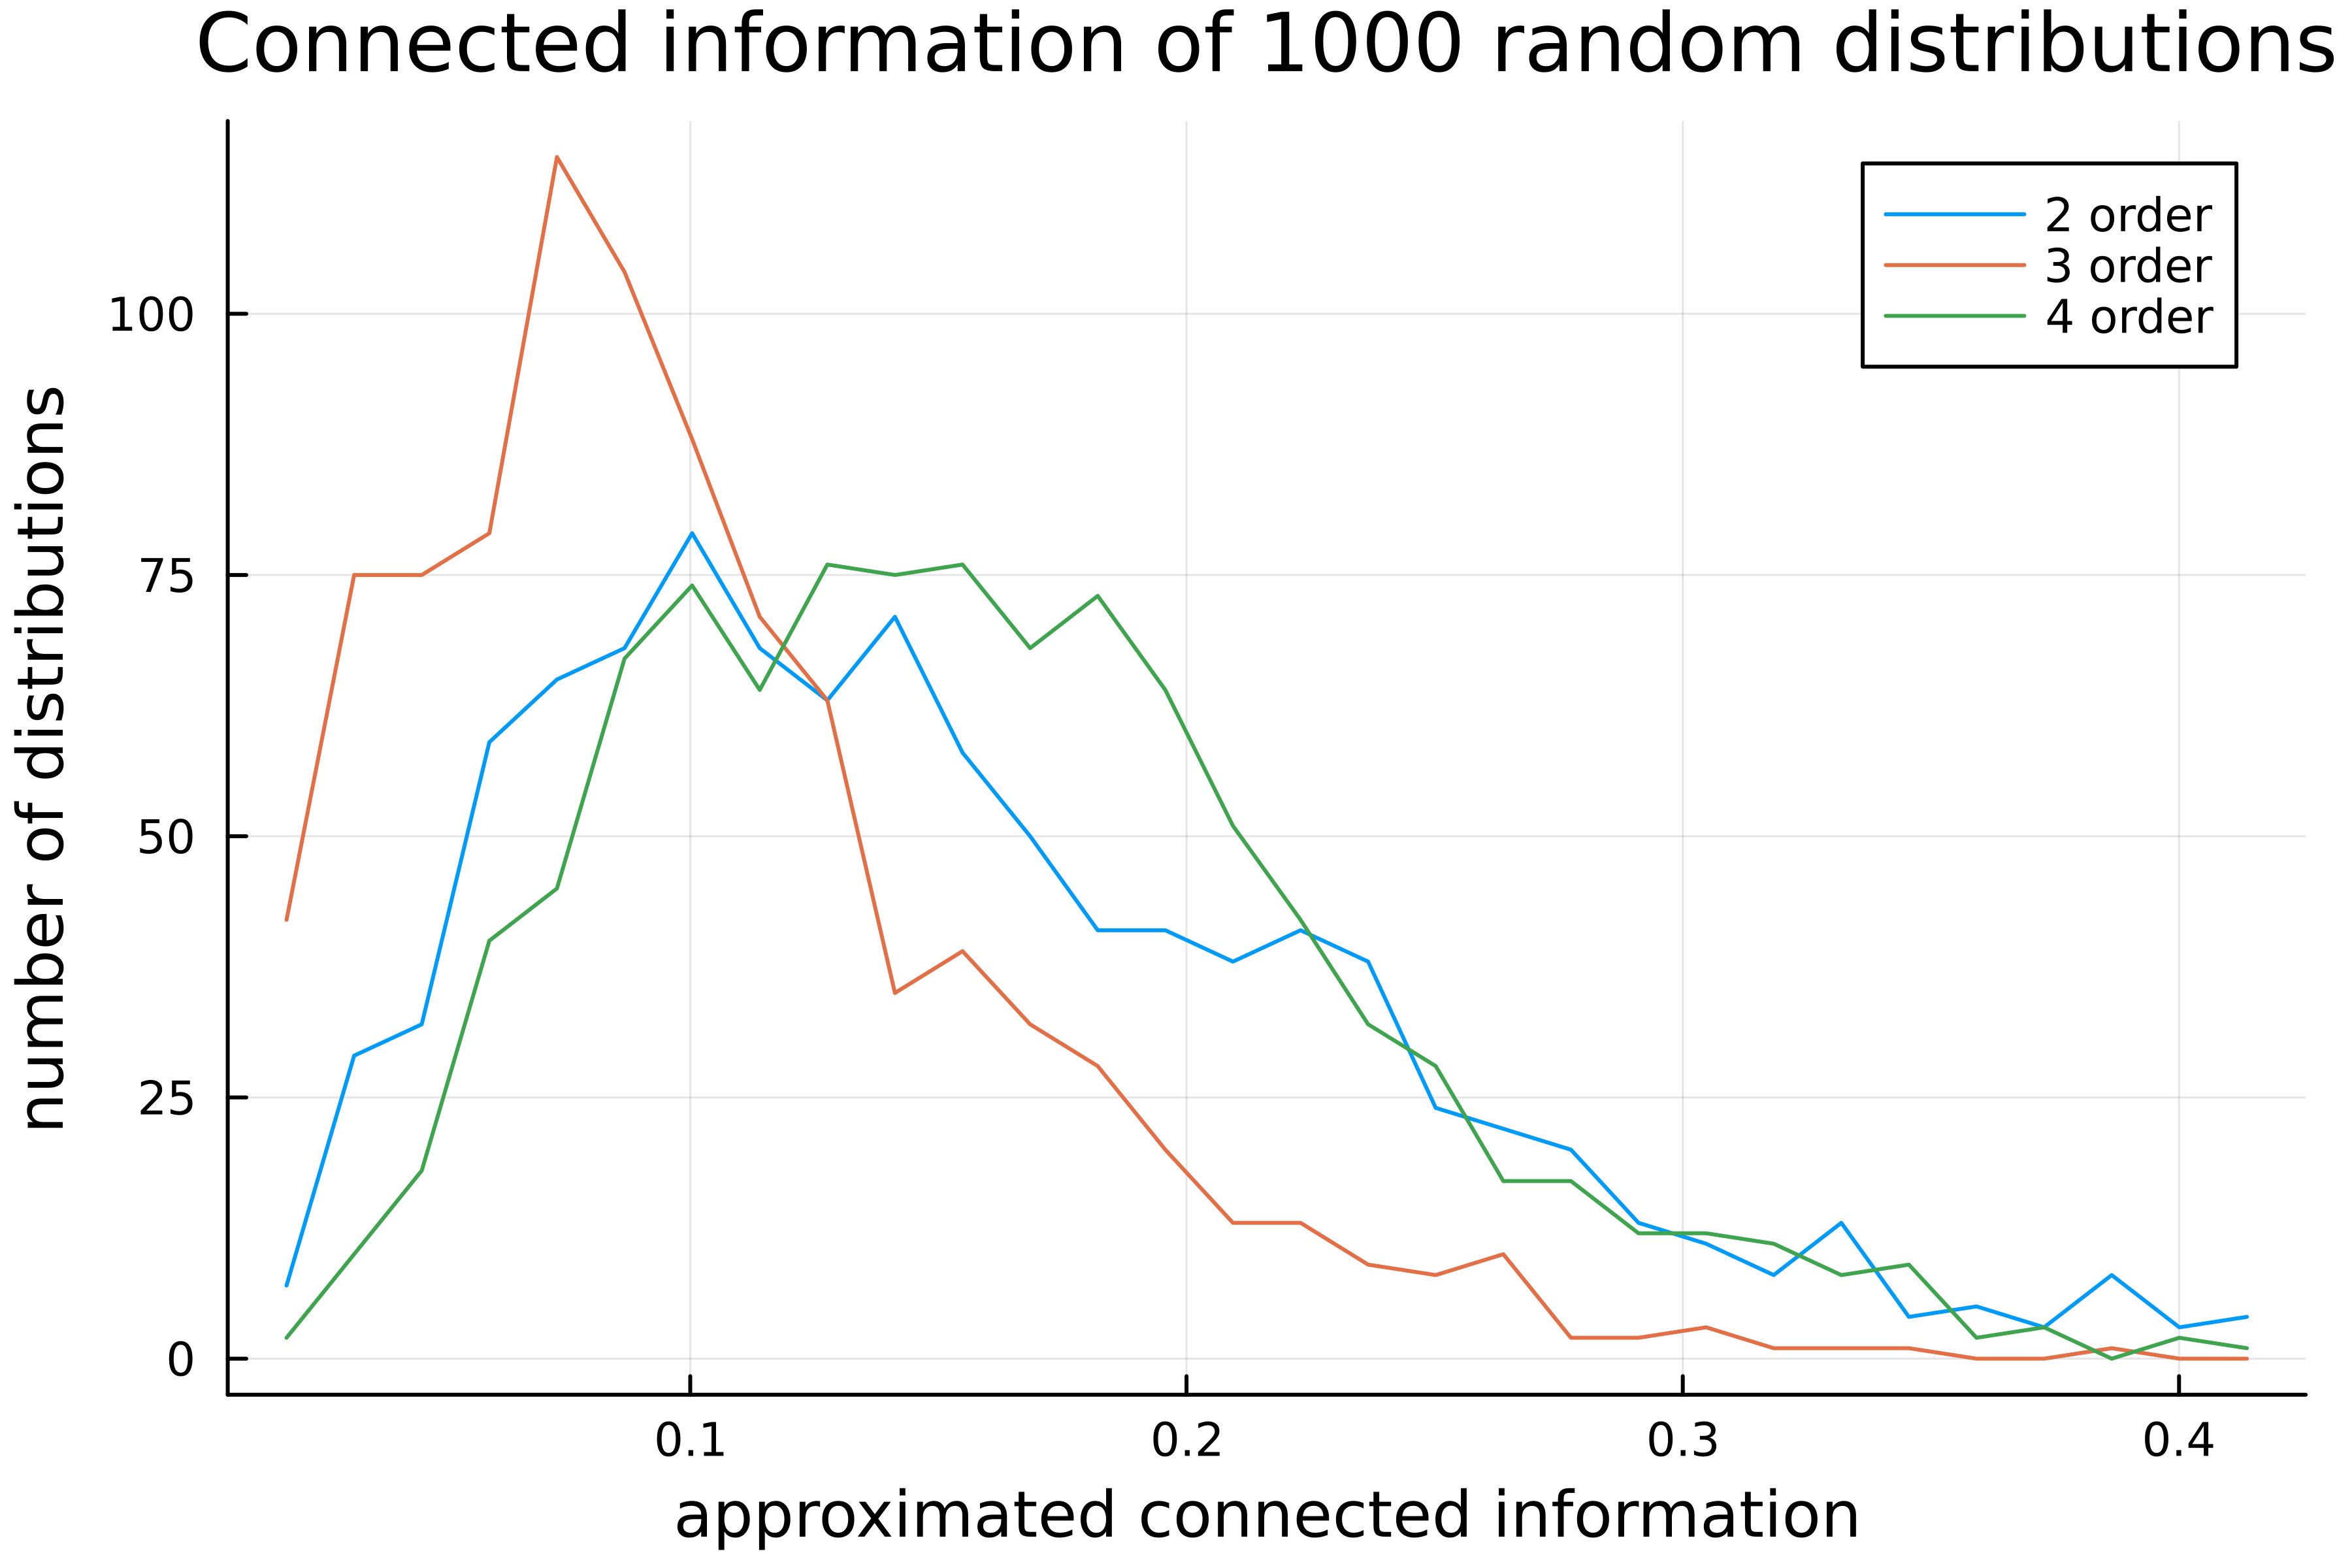

In [22]:
# Building estimated connected information plot

using Plots

min_e = minimum([lower_con_inf_results[i][2] for i=1:1000])
max_e = maximum([lower_con_inf_results[i][4] for i=1:1000]) 

bins_n = 30
bin_size = (max_e - min_e) / bins_n 
bins = zeros(bins_n, 3)

cur_bin_min = min_e
for b_i=1:bins_n
    for j = 2:4
        for i = 1:1000
            cur_inf = lower_con_inf_results[i][j]
            if cur_bin_min <= cur_inf < (cur_bin_min + bin_size)
                bins[b_i, (j - 1)] += 1
            end  
        end
    end
    cur_bin_min += bin_size
end

x = [min_e + (i*bin_size) for i=1:bins_n]
plot(
    x, bins,  
    label=["2 order" "3 order" "4 order"],
    title="Connected information of 1000 random distributions", 
    dpi=600)
xlabel!("approximated connected information")
ylabel!("number of distributions")
# savefig("con_inf_nsb_constraints_1000.png")

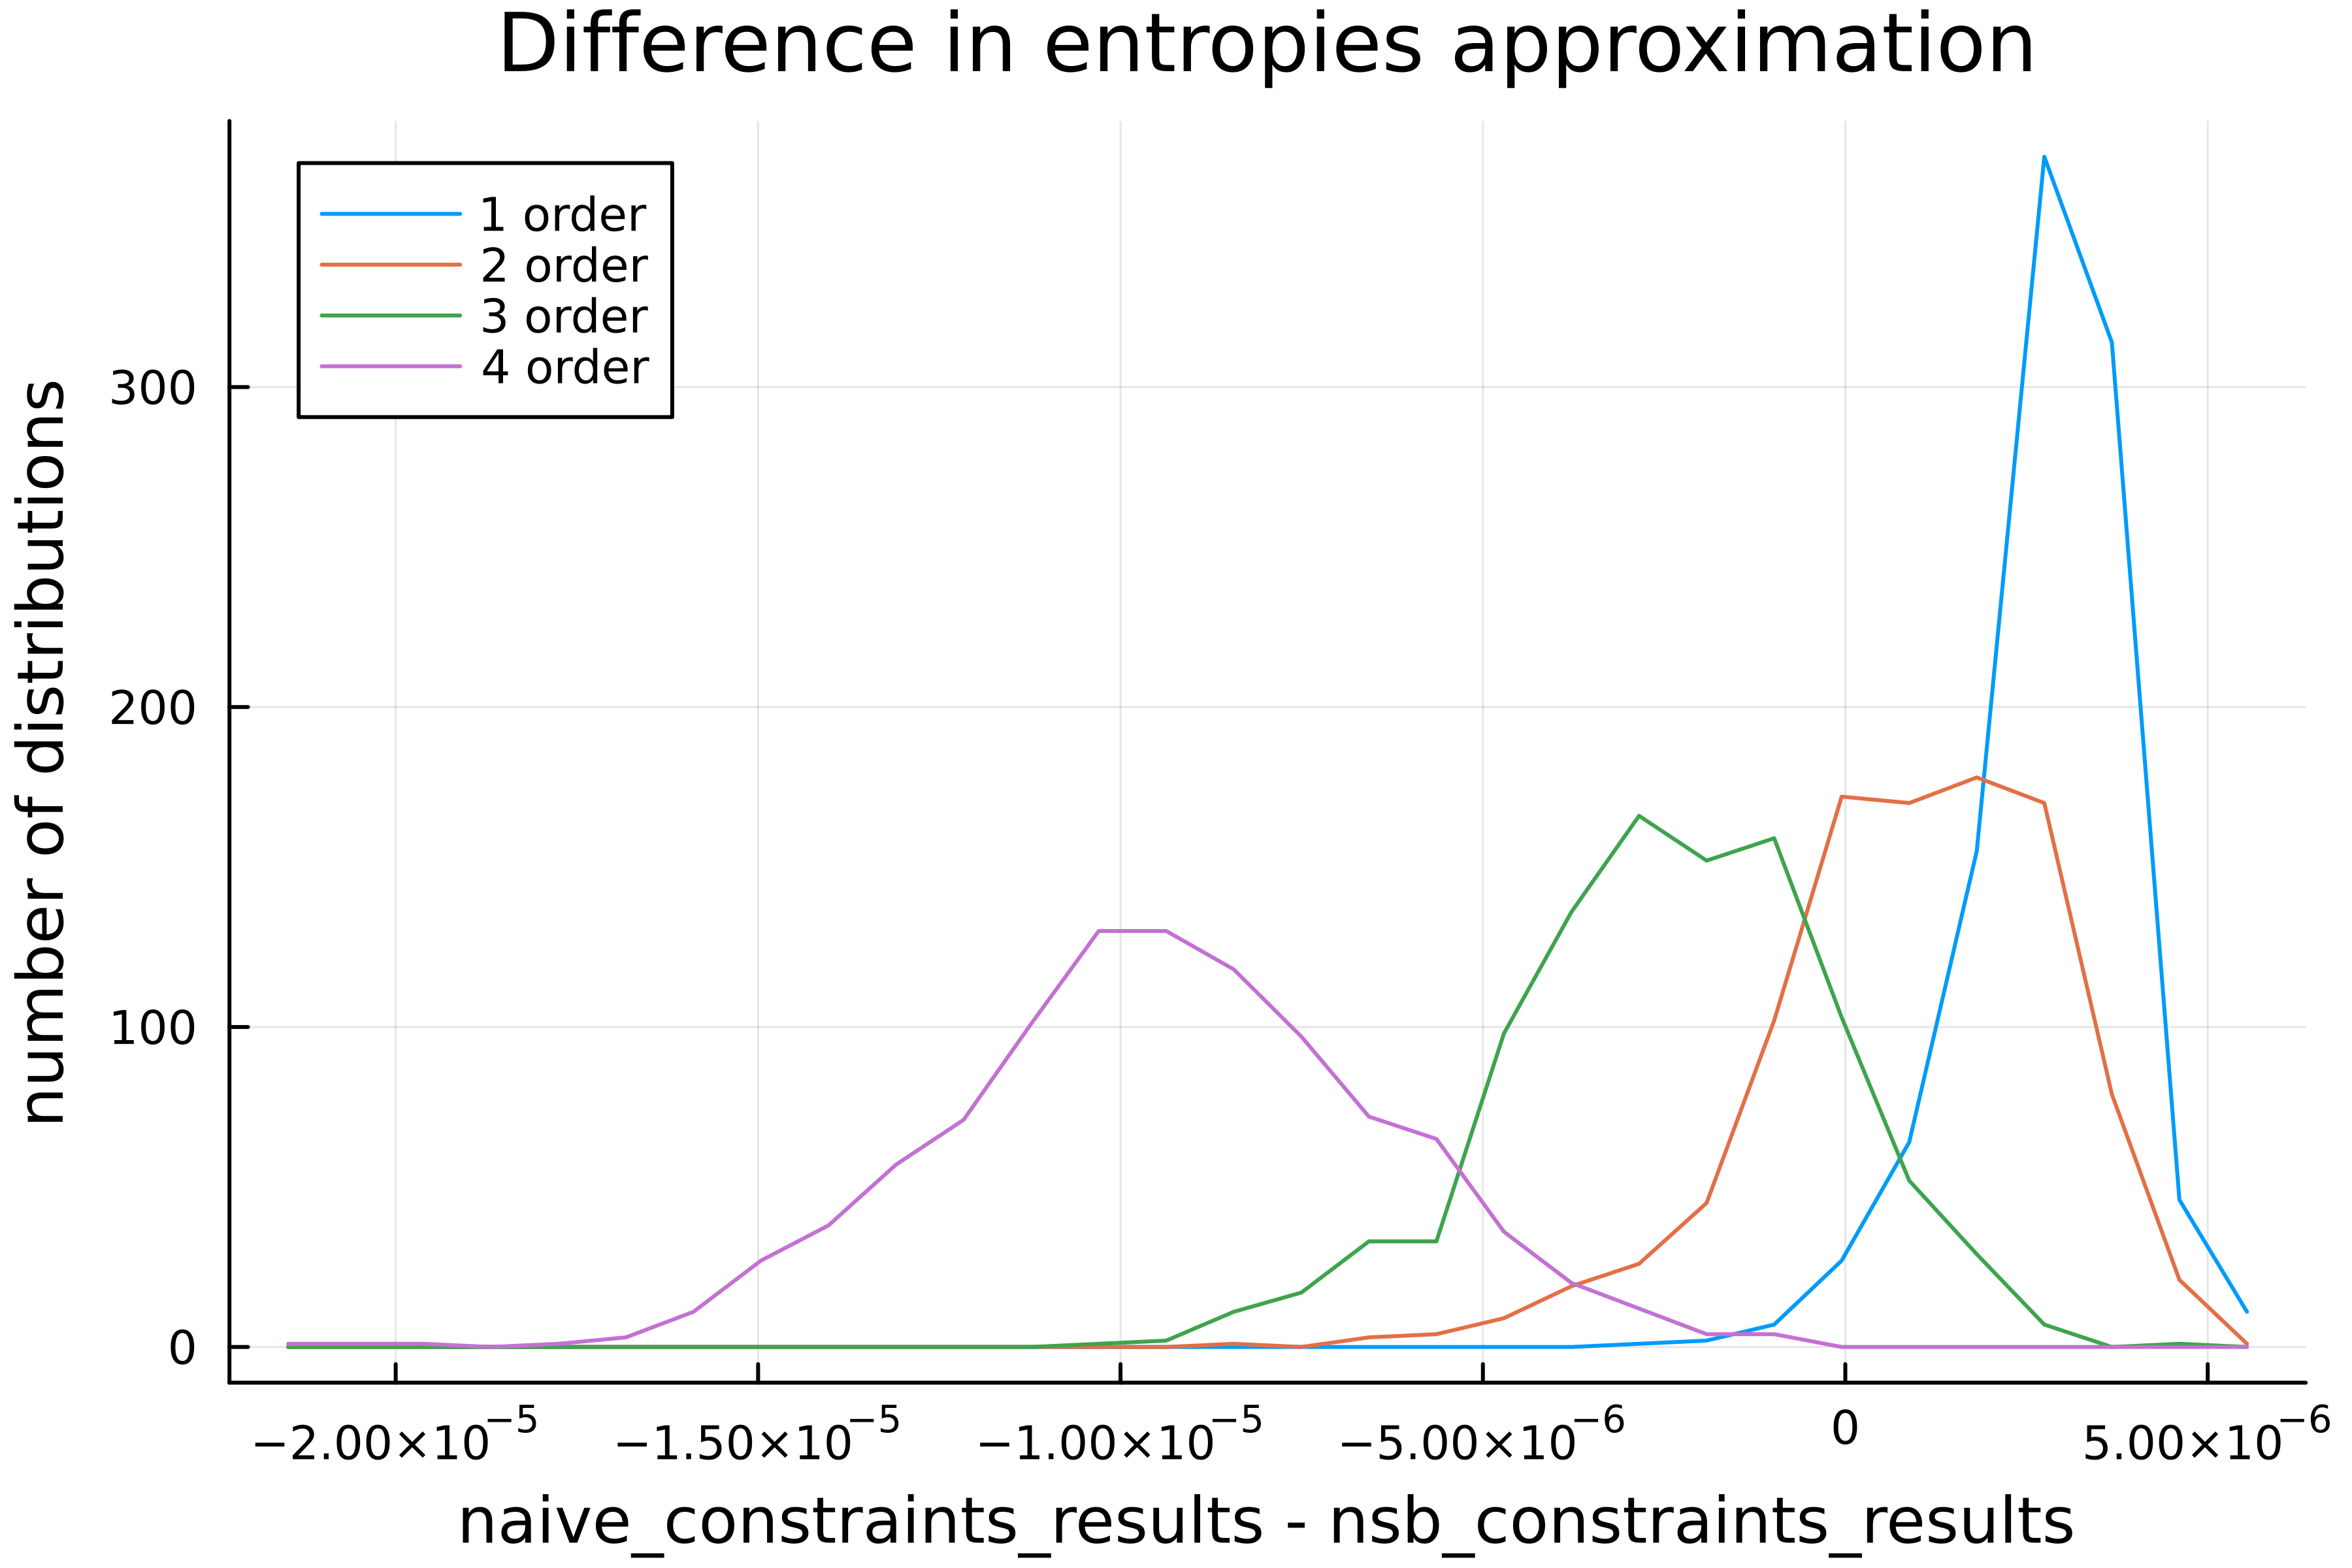

In [40]:
# Comparing results to naive entropies computation
# naive_max_entropies_results - nsb_constraints_max_entropies_results

using Plots

diff_entropies = naive_max_entropies_results - upper_max_entropies_results 

min_e = minimum([minimum(diff_entropies[i]) for i=1:1000])
max_e = maximum([maximum(diff_entropies[i]) for i=1:1000]) 

bins_n = 30
bin_size = (max_e - min_e) / bins_n 
bins = zeros(bins_n, 4)

cur_bin_min = min_e
for b_i=1:bins_n
    for j = 1:4
        for i = 1:1000
            cur_ent = diff_entropies[i][j]
            if cur_bin_min <= cur_ent < (cur_bin_min + bin_size)
                bins[b_i, j] += 1
            end  
        end
    end
    cur_bin_min += bin_size
end

x = [min_e + (i*bin_size) for i=1:bins_n]
plot(
    x, bins,  
    label=["1 order" "2 order" "3 order" "4 order"],
    title="Difference in entropies approximation", 
    dpi=600)
xlabel!("naive_constraints_results - nsb_constraints_results")
ylabel!("number of distributions")
# savefig("entropies_naive_nsb_diff_1000.png")

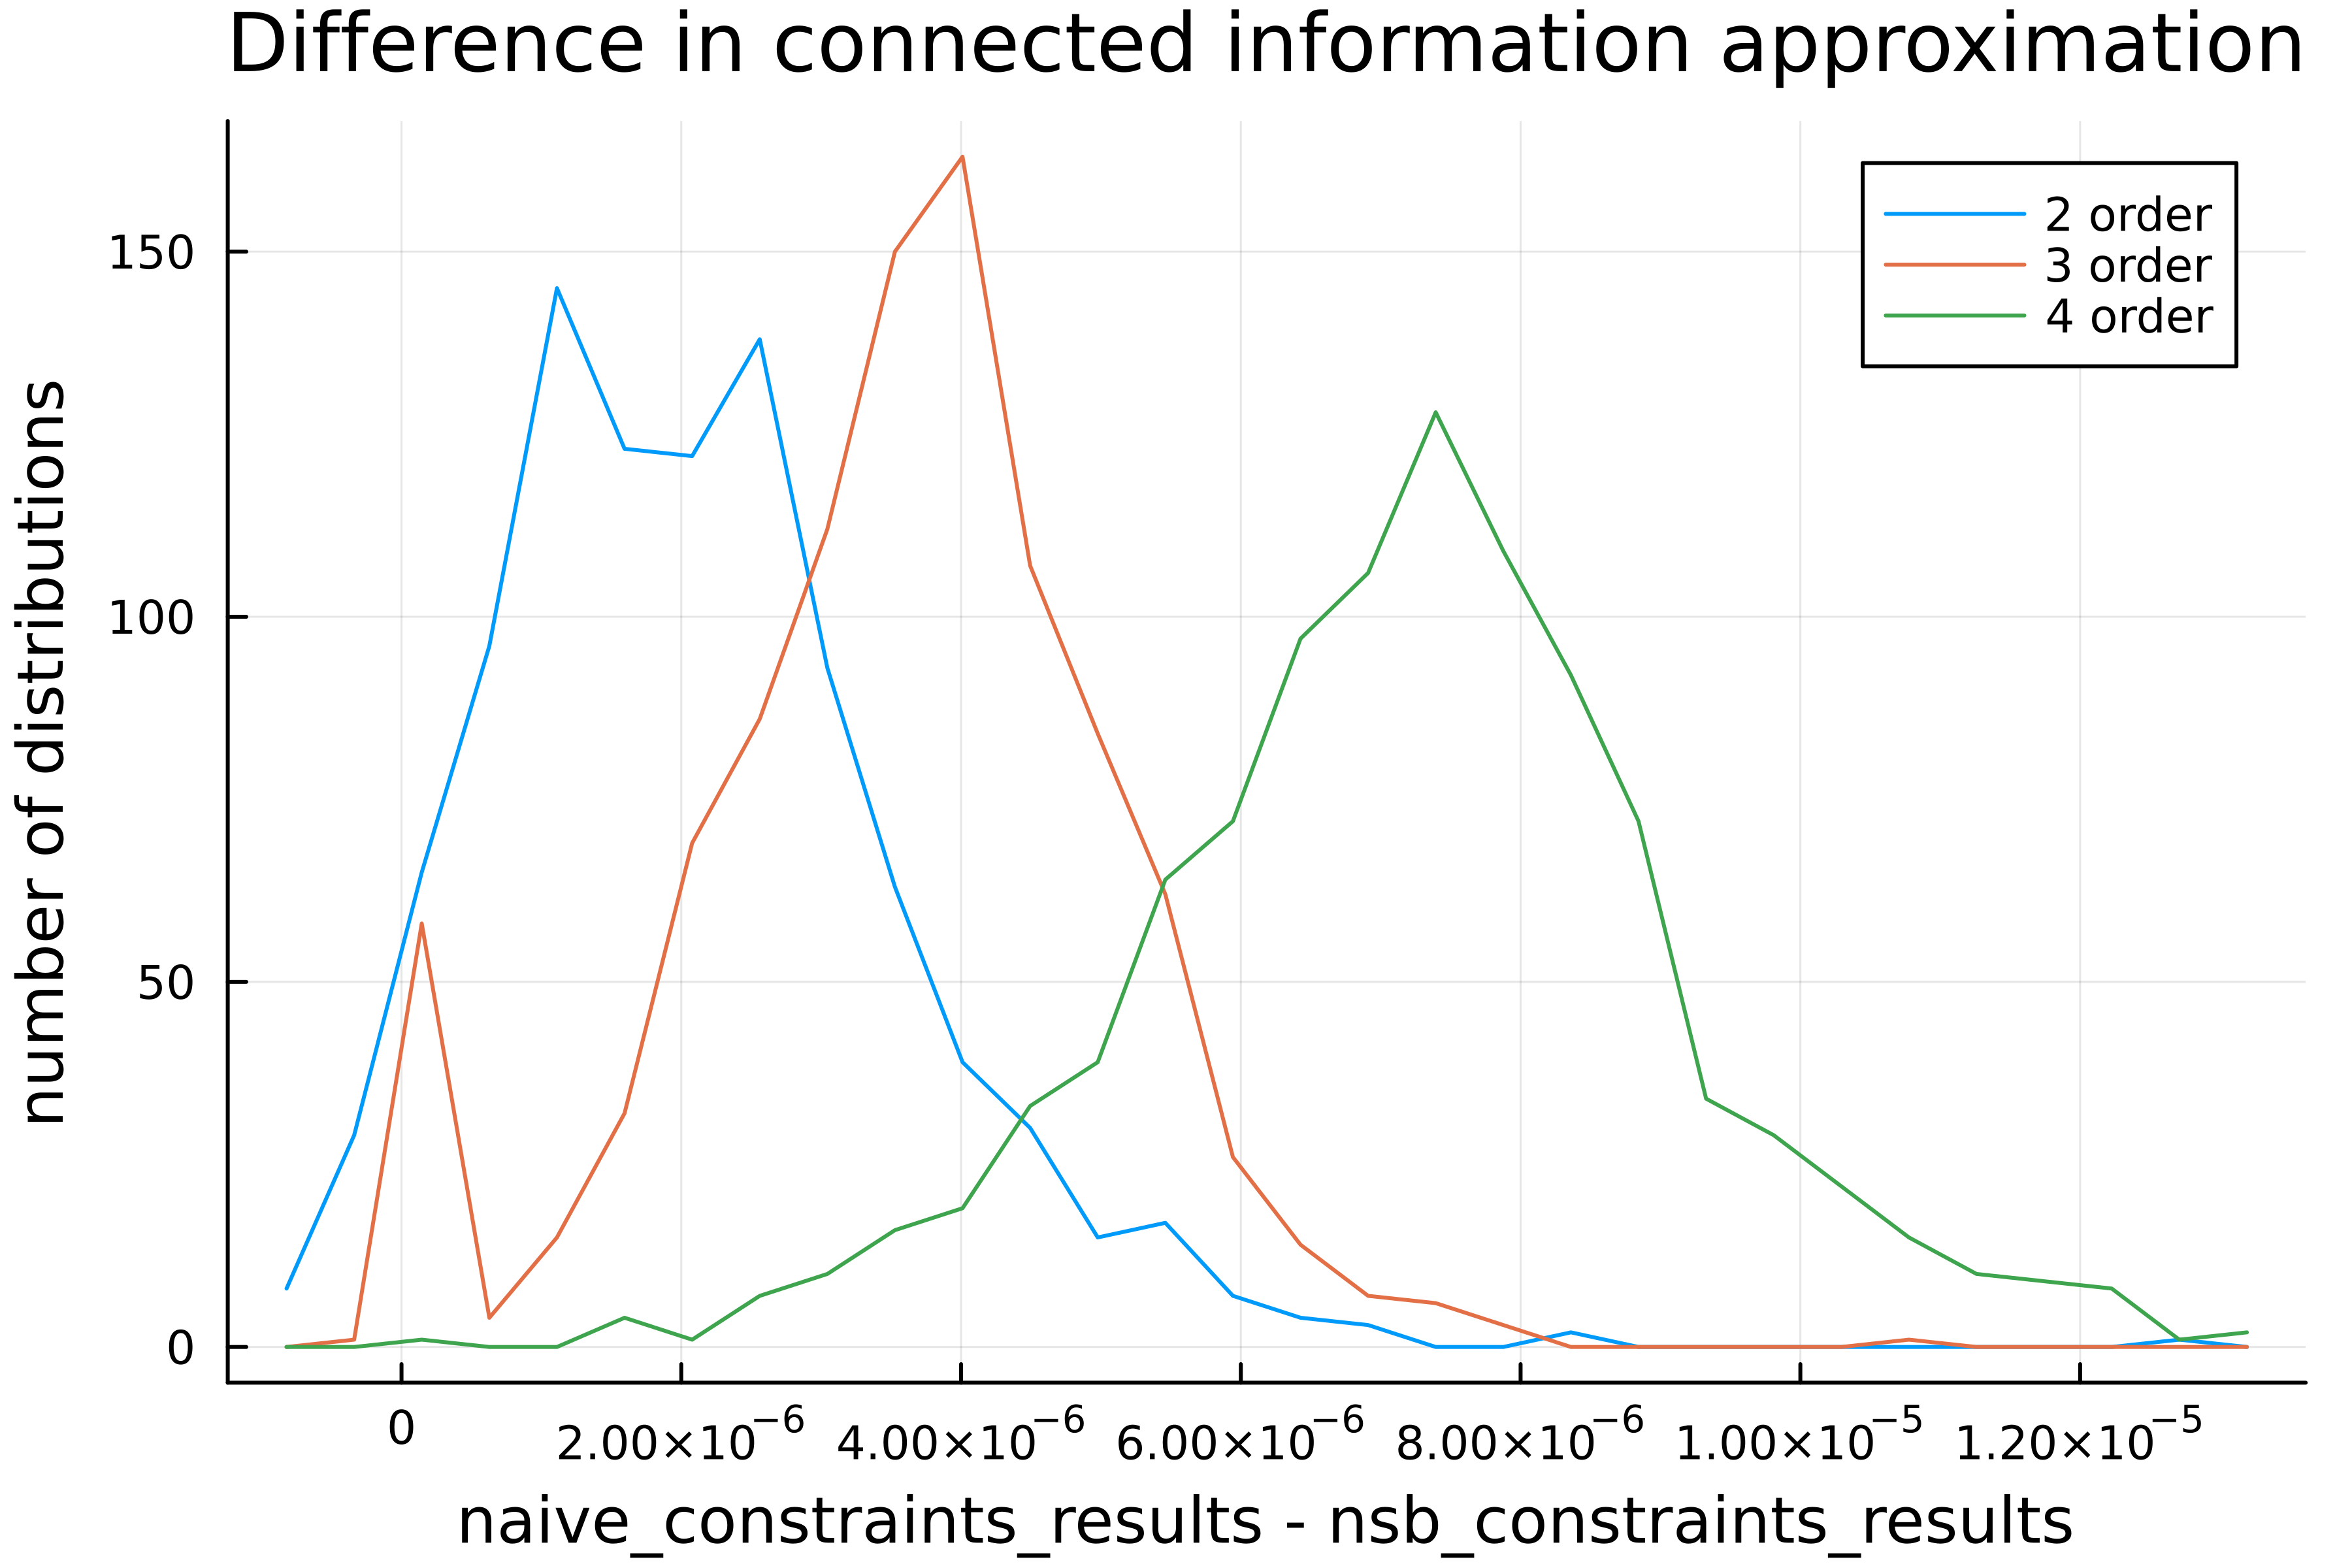

In [47]:
# Comparing results to naive entropies computation
# naive_con_inf_results - nsb_con_inf_results

using Plots

diff_con_inf = naive_con_inf_results - lower_con_inf_results
min_e = minimum([minimum(diff_con_inf[i][2:end]) for i=1:1000])
max_e = maximum([maximum(diff_con_inf[i][2:end]) for i=1:1000]) 

bins_n = 30
bin_size = (max_e - min_e) / bins_n 
bins = zeros(bins_n, 3)

cur_bin_min = min_e
for b_i=1:bins_n
    for j = 2:4
        for i = 1:1000
            cur_ent = diff_con_inf[i][j]
            if cur_bin_min <= cur_ent < (cur_bin_min + bin_size)
                bins[b_i, (j - 1)] += 1
            end  
        end
    end
    cur_bin_min += bin_size
end

x = [min_e + (i*bin_size) for i=1:bins_n]
plot(
    x, bins,  
    label=["2 order" "3 order" "4 order"],
    title="Difference in connected information approximation", 
    dpi=600)
xlabel!("naive_constraints_results - nsb_constraints_results")
ylabel!("number of distributions")
# savefig("con_inf_naive_nsb_diff_1000.png")